In [1]:
import pandas as pd
import numpy as np

In [2]:
from xgboost import XGBClassifier
XGBClassifier()  # return default parameter
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# See the descripion of the data
description = data['DESCR']
description

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

#### Geting X, y

In [5]:
X = data.data
y = data.target

In [6]:
data.feature_names # col name

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
X   # numpy array, does not allow head()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
# numpy array, does not allow head(), return error
#X.head()

In [9]:
# Make a nice datafram
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X.shape

(569, 30)

### Split the dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.2 ) # test size = 20% for small dataset

#### Model

In [12]:
# test1
model = XGBClassifier()  # generally default param give good accuary. 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_true=y_test, y_pred=y_predict))

0.956140350877193


In [13]:
# test2
model = XGBClassifier()  # generally default param give good accuary. 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

from sklearn.metrics import accuracy_score, classification_report
print('Training Accuracy :',accuracy_score(y_true=y_train, y_pred=y_train_predict))
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))

Training Accuracy : 1.0
Testing Accuracy :  0.956140350877193


1. its a very good accuray, so nothing much can be done, actually!

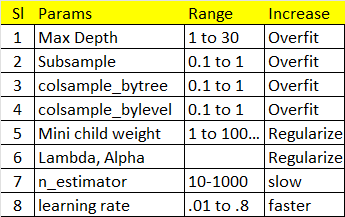

1. Since nothing can be done for improving accuracy, so for experiments purpose lets try to decreases accuracy
2. As we see increasing max_depth overfit, so decreasing mean actually comes down

In [14]:
# test2
model = XGBClassifier(max_depth=1,
                     )   
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

from sklearn.metrics import accuracy_score, classification_report
print('Training Accuracy :',accuracy_score(y_true=y_train, y_pred=y_train_predict))
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))

Training Accuracy : 0.9978021978021978
Testing Accuracy :  0.9736842105263158


In [15]:
model = XGBClassifier(max_depth=2,
                     )   
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

from sklearn.metrics import accuracy_score, classification_report
print('Training Accuracy :',accuracy_score(y_true=y_train, y_pred=y_train_predict))
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))

Training Accuracy : 1.0
Testing Accuracy :  0.9912280701754386


In [16]:
model = XGBClassifier(max_depth=3,
                     )   
model.fit(X_train, y_train)
y_predict = model.predict(X_test)         # apply on test data (generally predict on test data)
y_train_predict = model.predict(X_train)  # apply on train data

from sklearn.metrics import accuracy_score, classification_report
print('Training Accuracy :',accuracy_score(y_true=y_train, y_pred=y_train_predict))
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))

Training Accuracy : 1.0
Testing Accuracy :  0.9736842105263158


1. When max_depth size reduced, model get more generalized (good testing accuracy) 

In [17]:
# sub sample  , default is 1.0
model = XGBClassifier(max_depth=2,
                     subsample= 0.5,     # since very small dataset (around 600), taking subsample is very sensitive, be careful
                     )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

# accuray metrics Target(y) (Actual- Prediction), y_true: actual, y_pred: prediction (must on y)
from sklearn.metrics import accuracy_score, classification_report
print('Training Accuracy :', accuracy_score(y_true=y_train, y_pred=y_train_predict))      #y_true: y_train (Actual y kept for training, y_pred: (actul x train for predict)
print('Testing Accuracy :',accuracy_score(y_true=y_test, y_pred=y_predict))

Training Accuracy : 0.9978021978021978
Testing Accuracy : 0.9824561403508771


- See that, the model is coming out of overfitting, meaning that if subsample size increases it overfits (train > Test accuracy)
- if subsample reduces, then control overfitting mean trainging accuracy down and goes to pretty balance with testing accuracy
- sometimes it helps testing 

1. Metrics Accuracy : y_true ; y_pred
    Traing
    Testing
2. Accuracy always applied on y / target data
3. Structure : y_true: y_train,   y_pred: y_train_predict

#### Modeling: n_estimator

In [18]:
# N estimator
model = XGBClassifier(max_depth=2,
                     subsample = 1, 
                      n_estimators = 2 # only 2 trees, You expect reduction of both accuracy (train, test)              
                     )
# fit the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

# Evalulation (actual-predict) only target
from sklearn.metrics import accuracy_score
print('Training Accuracy : ',accuracy_score(y_true=y_train, y_pred= y_train_predict)) # y_true: y_test (which orginally kept for testing), then predict
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))

## Both accuracy reduce, like we are in underfitting region now!

Training Accuracy :  0.9494505494505494
Testing Accuracy :  0.9736842105263158


In [19]:
# N estimator
model = XGBClassifier(max_depth=2,
                     subsample = 1, 
                      n_estimators = 1 # crezy, does not make sence of 1 tree              
                     )
# fit the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

# Evalulation (actual-predict) only target
from sklearn.metrics import accuracy_score
print('Training Accuracy : ',accuracy_score(y_true=y_train, y_pred= y_train_predict)) # y_true: y_test (which orginally kept for testing), then predict
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))

## Both accuracy reduce, like we are in underfitting region now!

Training Accuracy :  0.9252747252747253
Testing Accuracy :  0.9035087719298246


In [20]:
# N estimator
model = XGBClassifier(max_depth=2,
                     subsample = 1, 
                      n_estimators = 100 # crezy, does not make sence of 1 tree              
                     )
# fit the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

# Evalulation (actual-predict) only target
from sklearn.metrics import accuracy_score
print('Training Accuracy : ',accuracy_score(y_true=y_train, y_pred= y_train_predict)) # y_true: y_test (which orginally kept for testing), then predict
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))


Training Accuracy :  1.0
Testing Accuracy :  0.9912280701754386


In [21]:
# Learning rate
model = XGBClassifier(max_depth=2,
                     subsample = 1, 
                      n_estimators = 100,
                      learning_rate = 0.01 # 0.01 very small step, default 0.1
                     )
# fit the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

# Evalulation (actual-predict) only target
from sklearn.metrics import accuracy_score
print('Training Accuracy : ',accuracy_score(y_true=y_train, y_pred= y_train_predict)) # y_true: y_test (which orginally kept for testing), then predict
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))

Training Accuracy :  0.9648351648351648
Testing Accuracy :  0.9473684210526315


1. if decrease learing rate by alpha & increase learning rate by alpha --> then you will see little increase in accuracy if large dataset

In [29]:
# Learning rate
model = XGBClassifier(max_depth=3,
                     subsample = 0.8, 
                      n_estimators = 100,
                      learning_rate = 0.01,
                      min_child_weight = 1,  # very important regularizer, works well
                      random_state = 5
                      
                     )
# fit the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

# Evalulation (actual-predict) only target
from sklearn.metrics import accuracy_score
print('Training Accuracy : ',accuracy_score(y_true=y_train, y_pred= y_train_predict)) # y_true: y_test (which orginally kept for testing), then predict
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))

Training Accuracy :  0.9846153846153847
Testing Accuracy :  0.9649122807017544


In [30]:
# accuracy improved by incresasing number of n estimator and reducing laring rate from 0.02 to .05
model = XGBClassifier(max_depth=3,
                     subsample = 0.8, 
                      n_estimators = 200,
                      learning_rate = 0.05,
                      min_child_weight = 1,  # very important regularizer, works well
                      random_state = 5
                      
                     )
# fit the model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

# Evalulation (actual-predict) only target
from sklearn.metrics import accuracy_score
print('Training Accuracy : ',accuracy_score(y_true=y_train, y_pred= y_train_predict)) # y_true: y_test (which orginally kept for testing), then predict
print('Testing Accuracy : ',accuracy_score(y_true=y_test, y_pred=y_predict))

Training Accuracy :  1.0
Testing Accuracy :  0.9824561403508771


In [23]:
# Test 3
model = XGBClassifier()  # generally default param give good accuary. 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_true=y_test, y_pred=y_predict))
print(classification_report(y_true=y_test, y_pred=y_predict))
pd.crosstab(y_test, y_predict)

0.956140350877193
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



col_0,0,1
row_0,,
0,45,2
1,3,64


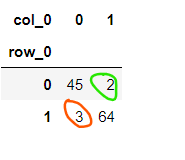

#### interpretation

1. Non Cancer & Cancer is 0, 1 respectively
2. 2 partient dont have cancer, but classified as Cancer ( lets say somewhat ok), 3 paticient having cancer or victim, but model recognized as non-cancer (this may have serious effect)!


# Additional

In [24]:
# How do I know what value to set for min_child_weight?
'''
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load data
data = xgb.DMatrix('data.csv')

# Set parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic'
}

# Define grid search parameters
grid_search_params = {
    'min_child_weight': [1, 5, 10, 20]
}

# Create grid search object
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(**params),
                           param_grid=grid_search_params,
                           scoring='roc_auc',
                           n_jobs=-1,
                           cv=5)

# Fit grid search object to data
grid_search.fit(data)


'''

"\nimport xgboost as xgb\nfrom sklearn.model_selection import GridSearchCV\n\n# Load data\ndata = xgb.DMatrix('data.csv')\n\n# Set parameters\nparams = {\n    'max_depth': 3,\n    'eta': 0.1,\n    'objective': 'binary:logistic'\n}\n\n# Define grid search parameters\ngrid_search_params = {\n    'min_child_weight': [1, 5, 10, 20]\n}\n\n# Create grid search object\ngrid_search = GridSearchCV(estimator=xgb.XGBClassifier(**params),\n                           param_grid=grid_search_params,\n                           scoring='roc_auc',\n                           n_jobs=-1,\n                           cv=5)\n\n# Fit grid search object to data\ngrid_search.fit(data)\n\n\n"

In this example, we define a range of values for min_child_weight (1, 5, 10, and 20) and use the GridSearchCV function from scikit-learn to find the optimal value of min_child_weight. The GridSearchCV function tries all possible combinations of the hyperparameters and returns the optimal value

### Additional Excercise

### GridSearch CV

CertainlyGridSearchCV is a function in the scikit-learn library that performs hyperparameter tuning by training and evaluating a machine learning model using different combinations of hyperparameters 1. The best set of hyperparameters is then selected based on a specified performance metric .

The GridSearchCV function exhaustively searches over a specified parameter grid to find the optimal hyperparameters for a given estimator 2. The function takes as input an estimator, a dictionary of hyperparameters to search over, and a cross-validation scheme 2. It then trains and evaluates the estimator using all possible combinations of hyperparameters and returns the best set of hyperparameters based on the specified performance metric 2.

Here’s an example of how to use the GridSearchCV function in scikit-learn:

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Load data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Define estimator
estimator = RandomForestClassifier(random_state=42)

# Define cross-validation scheme
cv = 5

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)

# Fit GridSearchCV object to data
grid_search.fit(X, y)

# Print best hyperparameters
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


In this example, we use the GridSearchCV function to find the optimal hyperparameters for a RandomForestClassifier estimator. We define a parameter grid with three hyperparameters to search over: n_estimators, max_depth, and min_samples_split. We then define a RandomForestClassifier estimator and a cross-validation scheme with 5 folds. Finally, we create a GridSearchCV object and fit it to the data. The best hyperparameters are printed at the end of the script

#### Q. can you show me learning curve code for understanding whether model is underfit of overfitting ?

[learning_curve] Training set sizes: [ 161  323  485  646  808  970 1131 1293 1455 1617]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


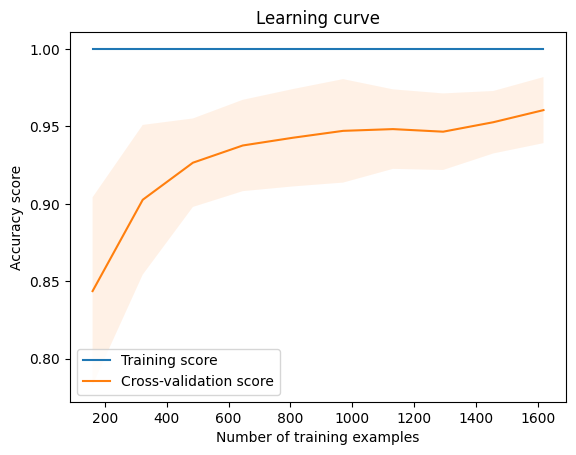

In [26]:
# Here’s an example of how to plot the learning curve for a machine learning model using scikit-learn:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC

# Load data
digits = load_digits()

# Define estimator
estimator = SVC(kernel='linear')

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator, digits.data, digits.target, cv=10, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Add standard deviation to plot
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend to plot
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy score')
plt.title('Learning curve')
plt.legend(loc='best')

# Show plot
plt.show()


In this example, we use the learning_curve function from scikit-learn to calculate the learning curve for a SVC estimator. We define a parameter grid with two hyperparameters to search over: C and gamma 1. We then calculate the learning curve using the learning_curve function and plot the results. The plot shows the training score and cross-validation score as a function of the number of training examples.

#### Interpretation of Learning Curve

A learning curve is a plot of the model’s performance on the training set and the validation set as a function of the number of training examples. The x-axis represents the number of training examples, while the y-axis represents the performance metric, such as accuracy or error rate.

A typical learning curve plot has two lines: one for the training set and one for the validation set. The training set line shows the performance of the model on the training set as a function of the number of training examples. The validation set line shows the performance of the model on the validation set as a function of the number of training examples.

To interpret a learning curve plot, you should look for the following patterns:

<b>Underfitting</b>: If both the training set and the validation set lines converge to a low score, then the model is likely to be underfitting. This means that the model is not complex enough to capture the underlying patterns in the data.

<b>Overfitting</b>: If the training set line converges to a high score while the validation set line converges to a low score, then the model is likely to be overfitting. This means that the model is too complex and is fitting the noise in the data instead of the underlying patterns

<b> Well-fit </b>: If both the training set and the validation set lines converge to a high score, then the model is likely to be well-fit. This means that the model is complex enough to capture the underlying patterns in the data without overfitting 

# Estimator

#### Q. How do I choose the optimal value of n_estimators?

The optimal value of n_estimators depends on the dataset and the problem you are trying to solve. One way to determine the optimal value is to use cross-validation and grid search.

In cross-validation, the data is split into multiple folds, and the model is trained and evaluated on each fold . The performance of the model is then averaged across all folds to obtain an estimate of the model’s performance.

Grid search is a technique that involves searching over a range of hyperparameters to find the optimal combination of hyperparameters. In the case of n_estimators, you can define a range of values for n_estimators and use grid search to find the optimal value.

Here’s an example of how to use cross-validation and grid search to find the optimal value of n_estimators in Random Forest:

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits

# Load data
digits = load_digits()

# Define estimator
estimator = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500]
}

# Define cross-validation scheme
cv = 5

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)

# Fit GridSearchCV object to data
grid_search.fit(digits.data, digits.target)

# Print best hyperparameters
print(grid_search.best_params_)


{'n_estimators': 500}


# Learning Rate

The learning rate is a hyper-parameter used in machine learning to control the pace at which an algorithm updates or learns the values of a parameter estimate. It is denoted by the symbol α and regulates the weights of our neural network concerning the loss gradient. In other words, it determines how often the neural network refreshes the notions it has learned .

The learning rate is a hyper-parameter because it is not learned from the data, but rather set by the machine learning engineer or data scientist. It is used to regulate how algorithms learn and modify the model’s performance.

A desirable learning rate is low enough for the network to converge on something useful while yet being high enough to train in a reasonable length of time 1. Smaller learning rates necessitate more training epochs because of the fewer changes. On the other hand, larger learning rates result in faster changes. Moreover, larger learning rates frequently result in a suboptimal final set of weights 

The learning rate is a crucial hyper-parameter that can significantly impact the performance of a machine learning model . It is essential to set the learning rate correctly to ensure that the model learns effectively and efficiently

#### Q. finding optimal learning rate in cross validation, give code example

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# Generate a random dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Define the parameter grid
param_grid = {'learning_rate_init': [0.001, 0.01, 0.1, 1]}

# Define the model
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Define the cross-validation method
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='accuracy')

# Fit the grid search
grid_search.fit(X, y)

# Print the best learning rate
print(f"The optimal learning rate is {grid_search.best_params_['learning_rate_init']}.")


The optimal learning rate is 0.1.
